### Задача на реальных данных: кластеризация учеников старшей школы

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./snsdata.csv')
data.shape

(30000, 40)

In [3]:
data.head(3)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


В датасете для учеников предоставлены следующие признаки:

    Год выпуска
    Пол
    Возраст
    Количество друзей
    36 ключевых слов, которые встречаются в профилe Facebook (интересы, сообщества, встречи)

Мы будем пытаться выделить кластеры исключительно по интересам, поэтому в первую очередь удалите все признаки, кроме ключевых слов.

Нормализуйте оставшиеся признаки с помощью StandardScaler(). Помните, что кластеризация — обучение без учителя, поэтому разделение на обучающую и тренировочную выборку не требуется.

Используйте метод k-means для кластеризации, количество кластеров возьмите за 9, random_state =123.

In [4]:
data.columns

Index(['gradyear', 'gender', 'age', 'friends', 'basketball', 'football',
       'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading',
       'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed',
       'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus',
       'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes',
       'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs'],
      dtype='object')

In [5]:
X = data.drop(['gradyear', 'gender', 'age', 'friends'], axis=1)
X.head()

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1


In [6]:
std_scaler = StandardScaler()
X_std = std_scaler.fit_transform(X)
X_std[:1,:]

array([[-0.33221726, -0.35769737, -0.2428741 , -0.21792782, -0.22366963,
        -0.25997057, -0.2073271 , -0.20113062, -0.1689389 , -0.29712339,
        -0.40236224, -0.18638435, -0.26732267, -0.26422495, -0.20261937,
         0.49445704, -0.26779479, -0.14142109, -0.58916128, -0.33779286,
        -0.34641063, -0.29755682, -0.19265386, -0.10424725, -0.38487252,
        -0.24690591, -0.05093652, -0.36991473, -0.48731424, -0.31419788,
        -0.20147627, -0.18303174, -0.29479321, -0.26153016, -0.22040264,
        -0.1749076 ]])

In [7]:
k_means = KMeans(n_clusters=9, random_state=123)
k_means.fit(X_std)

KMeans(n_clusters=9, random_state=123)

### Задание:
Укажите номер кластера, в который попало меньше всего учеников.

In [8]:
k_means_pred = k_means.labels_
_, counts = np.unique(k_means_pred, return_counts=True)
for count in counts:
    print(count, end=' ')

20345 424 830 1 1026 932 644 5034 764 

In [9]:
print('Номер кластера, в который попало меньше всего учеников: ', counts.argmin())

Номер кластера, в который попало меньше всего учеников:  3


### Задание:
В один из кластеров попали ученики с интересами **music, god, dance, hair, shopping, cute, band, rock, football, church**. Сколько всего учеников попали в этот кластер?

In [10]:
X['cluster_label'] = k_means.labels_
#X.head()

In [11]:
find_cluster = []
set_of_interests = set(['music', 'god', 'dance', 'hair', 'shopping', 
                        'cute', 'band', 'rock', 'football', 'church'])
for k, group in X.groupby('cluster_label'):
    #print(k)
    top_words = group.iloc[:,:-1].mean()\
                 .sort_values(ascending=False)\
                 .head(10)
    #print(top_words)
    if set(top_words.index)==set_of_interests:
        find_cluster.append(k)

#print('Кластеры подходящие условию задачи: ', find_cluster)
print('Кол-во учеников с интересами по условию задачи:', np.sum([counts[ind] for ind in find_cluster]))

Кол-во учеников с интересами по условию задачи: 0.0


## Агломеративная кластеризация

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
dataset = datasets.make_blobs(n_samples=n_samples, centers=2, center_box=(-7.0, 7.5),
                              cluster_std=[1.4, 1.7],
                              random_state=42)
X_2, _ = datasets.make_blobs(n_samples=n_samples, random_state=170, centers=[[-4, -3]], cluster_std=[1.9])
transformation = [[1.2, -0.8], [-0.4, 1.7]]
X_2 = np.dot(X_2, transformation)
X, y = np.concatenate((dataset[0], X_2)), np.concatenate((dataset[1], np.array([2] * len(X_2))))

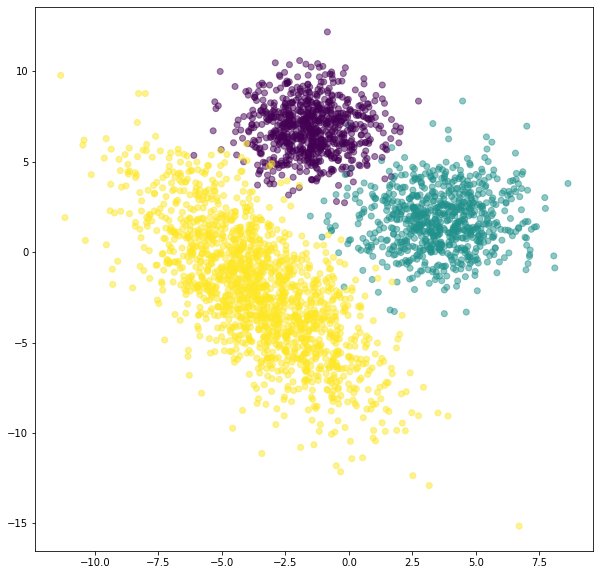

In [2]:
plt.rcParams['figure.figsize'] = 10, 10
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5)
plt.show()

In [3]:
unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))
{0: 750, 1: 750, 2: 1500}

{0: 750, 1: 750, 2: 1500}

In [4]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering()

In [ ]:
ac.fit(X)